In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!gdown https://drive.google.com/uc?id=1zg5EDls7E4ZnkWzPKh_XNkw564ns22mq

Downloading...
From (original): https://drive.google.com/uc?id=1zg5EDls7E4ZnkWzPKh_XNkw564ns22mq
From (redirected): https://drive.google.com/uc?id=1zg5EDls7E4ZnkWzPKh_XNkw564ns22mq&confirm=t&uuid=b322d3e4-3001-4963-83ad-936c49da6de3
To: /content/train.zip
100% 6.74G/6.74G [02:10<00:00, 51.5MB/s]


In [3]:
!unzip 'train.zip' -d './'

Streaming output truncated to the last 5000 lines.
  inflating: ./train/41816_(40.7047526666667, -89.4608695)_ 2023-10-20 16-42-07_33.72365_D.jpg  
  inflating: ./train/16916_[40.69494786651222, -89.48369358076923]_ 2023-10-20 17-36-11_45.251_LD.jpg  
  inflating: ./train/53723_(40.699986, -89.4837131666667)_ 2023-10-20 17-37-25_51.49105_D.jpg  
  inflating: ./train/55412_(40.6966803333333, -89.4787348333333)_ 2023-10-20 17-50-10_30.15685_D.jpg  
  inflating: ./train/51755_(40.7101988333333, -89.4335621666667)_ 2023-10-20 15-48-40_31.80705_D.jpg  
  inflating: ./train/41465_(40.7034623333333, -89.4568478333333)_ 2023-10-20 16-38-53_36.5856_D.jpg  
  inflating: ./train/24984_(40.7031965, -89.4182918333333)_ 2023-10-20 20-39-41_53.3392_D.jpg  
  inflating: ./train/36813_[40.71996829858886, -89.430331386764]_ 2023-10-18 19-50-27_39.9785_LD.jpg  
  inflating: ./train/46396_[40.70317209965856, -89.41759358108614]_ 2023-10-20 19-57-15_41.41965_LD.jpg  
  inflating: ./train/56792_[40.68761302

In [4]:
!gdown --id '1KdNjCIot9SYh9JxRHuCjrPdmgUDazZ9U'

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1KdNjCIot9SYh9JxRHuCjrPdmgUDazZ9U
From (redirected): https://drive.google.com/uc?id=1KdNjCIot9SYh9JxRHuCjrPdmgUDazZ9U&confirm=t&uuid=ed0fde14-7a52-4573-9ca7-9808c33bd4a0
To: /content/test.zip
100% 2.92G/2.92G [00:59<00:00, 49.2MB/s]


In [5]:
!unzip 'test.zip' -d './'

Archive:  test.zip
   creating: ./test/
  inflating: ./test/3910_[40.70800769388502, -89.38938456054692]_ 2023-10-18 16-18-59_22.8697_LD.jpg  
  inflating: ./test/6780_(40.7029723333333, -89.4051231666667)_ 2023-10-18 17-02-15_4.22725_D.jpg  
  inflating: ./test/1101_(40.7033468333333, -89.40616)_ 2023-10-18 15-48-47_16.61855_D.jpg  
  inflating: ./test/20513_(40.7089811666667, -89.4348416666667)_ 2023-10-20 19-10-05_2.42905_D.jpg  
  inflating: ./test/40399_[40.71426820356199, -89.43796371571018]_ 2023-10-20 15-30-41_16.81465_LD.jpg  
  inflating: ./test/46049_(40.7022096666667, -89.4174218333333)_ 2023-10-20 19-53-28_33.02435_D.jpg  
  inflating: ./test/13181_(40.6990283333333, -89.4438793333334)_ 2023-10-20 16-23-39_27.63715_D.jpg  
  inflating: ./test/9211_(40.7292421666667, -89.4384211666667)_ 2023-10-18 20-17-08_25.84265_D.jpg  
  inflating: ./test/32770_[40.7163773348367, -89.41645742478786]_ 2023-10-18 19-10-20_22.4405_LD.jpg  
  inflating: ./test/38808_[40.72804633333324, -89.

In [6]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2

In [7]:
image_folder_path = '/content/train'
label = pd.read_csv('/content/train.csv')
label

image_name  pci
0     10745_[40.72376740448161, -89.44599936927897]_...  100
1     49812_[40.700766104509725, -89.3989279463273]_...  100
2     60080_(40.69357, -89.45994)_ 2023-10-20 18-29-...  100
3     2205_(40.7031665, -89.4067306666667)_ 2023-10-...   12
4     28158_[40.7079780926376, -89.39486040573811]_ ...  100
...                                                 ...  ...
7699  50163_[40.72745176497602, -89.44607423922417]_...    2
7700  39726_(40.7134895, -89.4464335)_ 2023-10-20 15...   27
7701  46043_[40.70196840346229, -89.41743936921954]_...  100
7702  532_[40.720060087307424, -89.41598975752204]_ ...   78
7703  23010_[40.70206655352601, -89.42162673798646]_...   46

[7704 rows x 2 columns]

In [88]:
label.columns

Index(['image_name', 'pci'], dtype='object')

In [89]:
len(label[label['pci']<0])

17

## Exploring the training dataset

In [90]:
label['pci'].unique()

array([100,  12,  29,  25,   4,  36,  45,  64,  71,  41,  48,  97,  78,
        15,  88,  59,  44,  26,  39,  38,  52,   6,  13,  93,  16,   8,
        43,  68,  62,  91,  34,  65,  87,  31,  37,  51,  49,  28,  27,
        46,  63,  47,  75,  23,  42,  20,  83,  55,  70,  96,  14,  84,
        32,  94,  58,  81,  73,  86,  24,  99,  92,  60,  77,  35,  17,
        95,  54,  40,  21,  33,  19,  22,  69,  18,  72,  11,  79,  74,
        61,   2,  -1,  67,  82,  -3,  76,  98,  66,  56,  89,   7,  90,
        10,   0,  53,  85,  -8,   9,   1,   3,  -5,  57,   5,  -2,  -7,
        -4])

In [91]:
label['pci'].value_counts().head(10)

100    2259
64      668
4       272
48      217
78      188
38      175
44      173
16      163
46      159
88      157
Name: pci, dtype: int64

In [92]:
label['pci'].value_counts().tail(20)

 20    11
 19    10
 7     10
 68     9
 22     9
 10     8
 11     7
 9      7
-1      6
 13     6
 3      4
 0      4
-7      3
-2      2
 1      2
-3      2
-8      2
-5      1
 5      1
-4      1
Name: pci, dtype: int64

In [93]:
label['pci'].describe()

count    7704.000000
mean       65.378505
std        30.825996
min        -8.000000
25%        42.000000
50%        64.000000
75%       100.000000
max       100.000000
Name: pci, dtype: float64

In [94]:
# Filter out rows where the 'pci' column has negative values

label['pci'] = label['pci'].apply(lambda x: max(x, 0))
label

image_name  pci
0     10745_[40.72376740448161, -89.44599936927897]_...  100
1     49812_[40.700766104509725, -89.3989279463273]_...  100
2     60080_(40.69357, -89.45994)_ 2023-10-20 18-29-...  100
3     2205_(40.7031665, -89.4067306666667)_ 2023-10-...   12
4     28158_[40.7079780926376, -89.39486040573811]_ ...  100
...                                                 ...  ...
7699  50163_[40.72745176497602, -89.44607423922417]_...    2
7700  39726_(40.7134895, -89.4464335)_ 2023-10-20 15...   27
7701  46043_[40.70196840346229, -89.41743936921954]_...  100
7702  532_[40.720060087307424, -89.41598975752204]_ ...   78
7703  23010_[40.70206655352601, -89.42162673798646]_...   46

[7704 rows x 2 columns]

In [95]:
label['pci'].describe()

count    7704.000000
mean       65.386552
std        30.808186
min         0.000000
25%        42.000000
50%        64.000000
75%       100.000000
max       100.000000
Name: pci, dtype: float64

In [96]:
label['pci'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7704 entries, 0 to 7703
Series name: pci
Non-Null Count  Dtype
--------------  -----
7704 non-null   int64
dtypes: int64(1)
memory usage: 60.3 KB


In [97]:
label['pci'].value_counts().tail(20)

71    14
24    13
58    13
57    13
17    12
99    12
54    12
21    12
20    11
7     10
19    10
68     9
22     9
10     8
9      7
11     7
13     6
3      4
1      2
5      1
Name: pci, dtype: int64

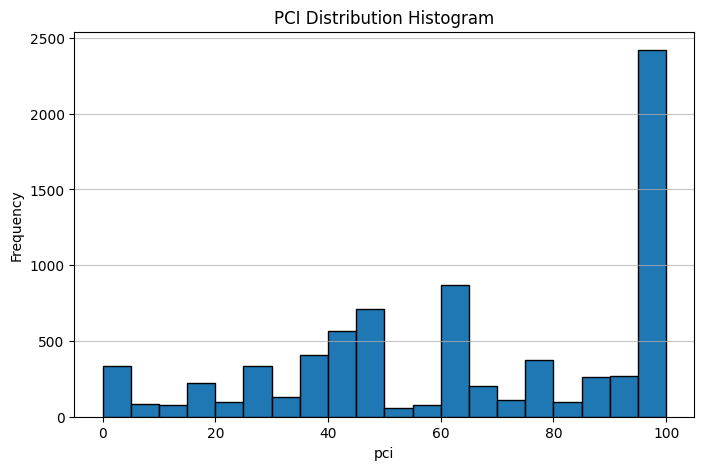

In [98]:
plt.figure(figsize=(8, 5))
plt.hist(label['pci'], bins=20, edgecolor='k')
plt.xlabel('pci')
plt.ylabel('Frequency')
plt.title('PCI Distribution Histogram')
plt.grid(axis='y', alpha=0.75)
plt.show()

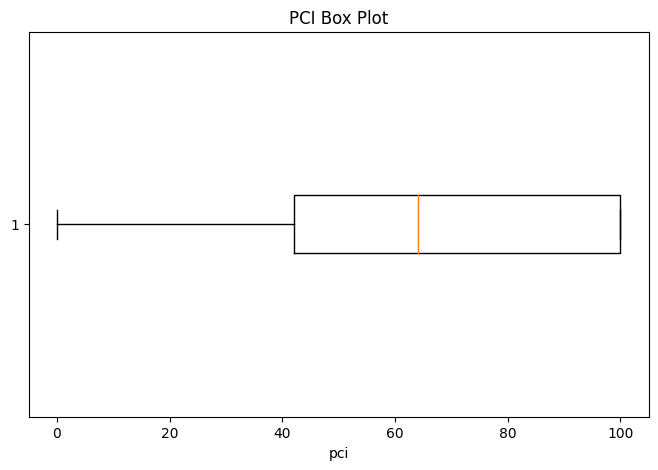

In [99]:
plt.figure(figsize=(8, 5))
plt.boxplot(label['pci'], vert=False)
plt.xlabel('pci')
plt.title('PCI Box Plot')
plt.show()

In [100]:
# Calculate skewness, variance, and kurtosis of the 'PCI' column
pci_skewness = label['pci'].skew()
pci_variance = label['pci'].var()
pci_kurtosis = label['pci'].kurt()

(pci_skewness, pci_variance, pci_kurtosis)

(-0.35442336638492533, 949.1443394564216, -1.0983980427845892)

Skewness shows a fairly balanced PCI distribution

In [101]:
# Function to display images with specific PCI values in a 4x5 grid
def display_images_with_specified_pci(dataframe, image_folder, pci_values):
    num_rows = 4
    num_columns = 5
    num_images = num_rows * num_columns

    # Filter the DataFrame to select rows with specified PCI values
    filtered_data = dataframe[dataframe['pci'].isin(pci_values)]

    # Randomly select rows if there are more than the desired number of images
    if len(filtered_data) > num_images:
        random_indices = np.random.choice(len(filtered_data), num_images, replace=False)
        filtered_data = filtered_data.iloc[random_indices]

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 12))

    for i, (_, row) in enumerate(filtered_data.iterrows()):
        image_name = row['image_name']
        pci = row['pci']

        # Load and display the image
        image_path = os.path.join(image_folder, image_name)
        image = cv2.imread(image_path)

        # Add text label with PCI on top of the image
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.4
        font_thickness = 1
        text_color = (255, 255, 255)

        cv2.putText(image, f'PCI: {pci}', (10, 20), font, font_scale, text_color, font_thickness)

        # Determine the subplot position
        row_idx = i // num_columns
        col_idx = i % num_columns

        # Display the image on the subplot
        axes[row_idx, col_idx].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[row_idx, col_idx].set_title(f'PCI: {pci}')
        axes[row_idx, col_idx].axis('off')

    plt.tight_layout()
    plt.show()

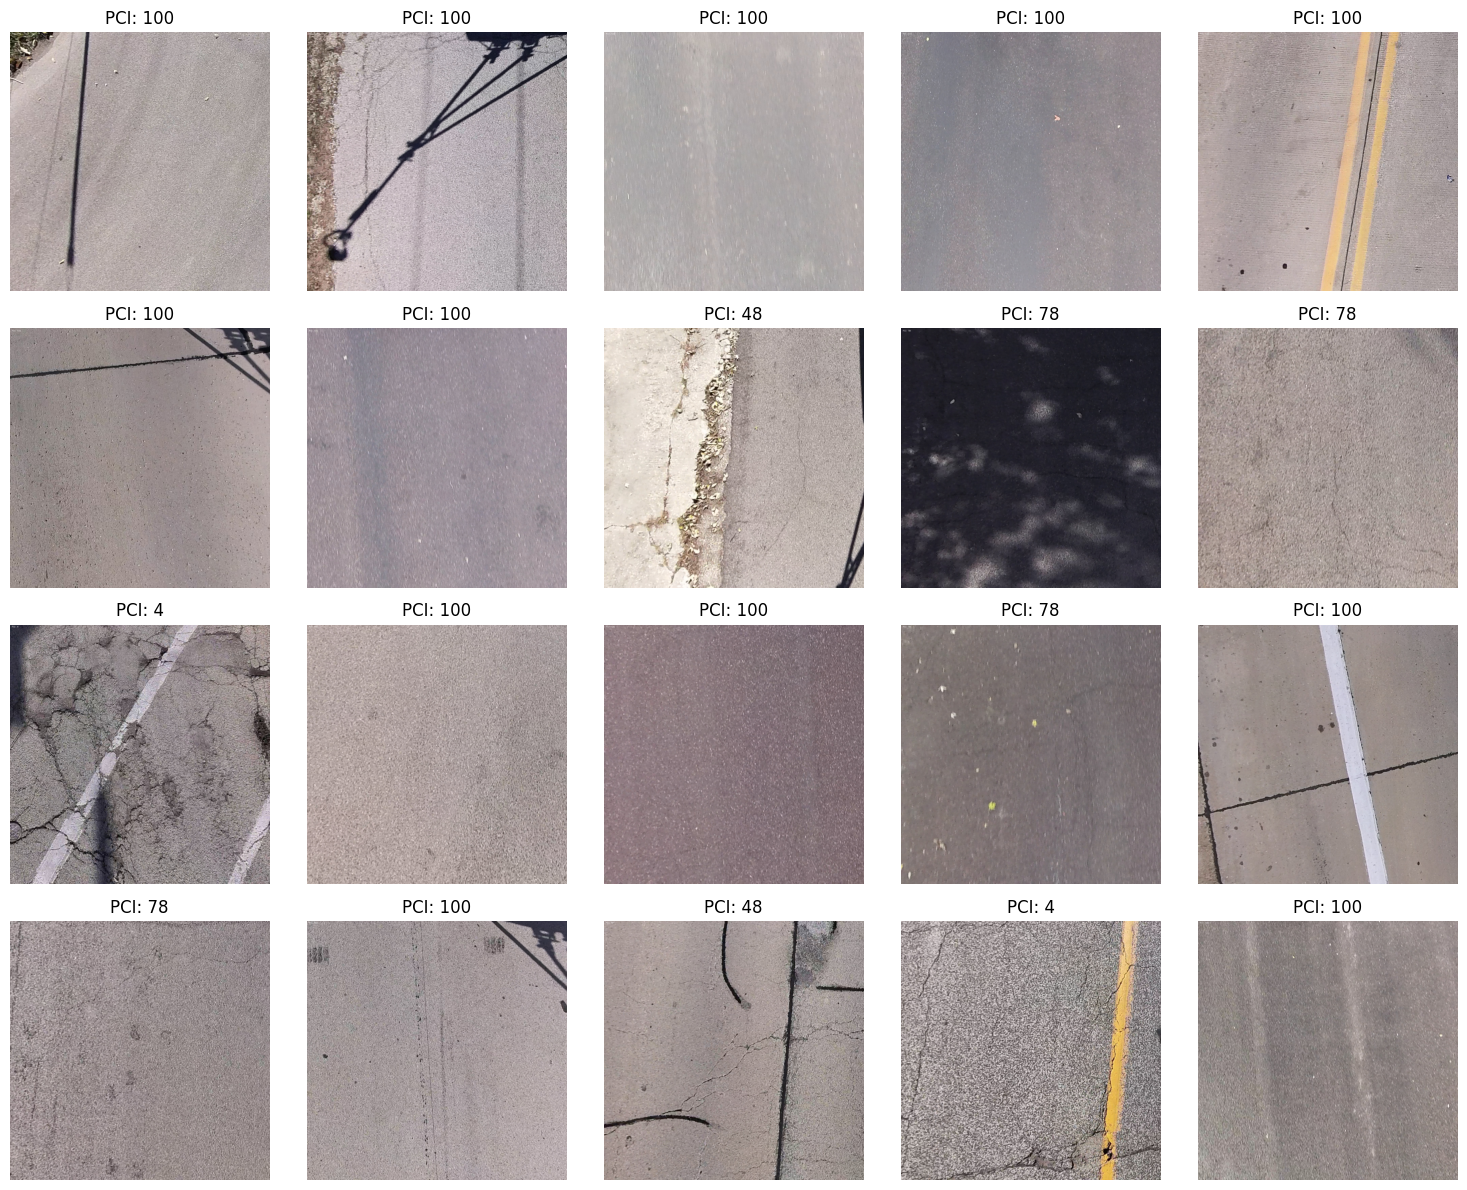

In [102]:
# Display images with specified PCI values in a 4x5 grid for values in the top 10
pci_values = [4, 78, 48, 100]
display_images_with_specified_pci(label, image_folder_path, pci_values)

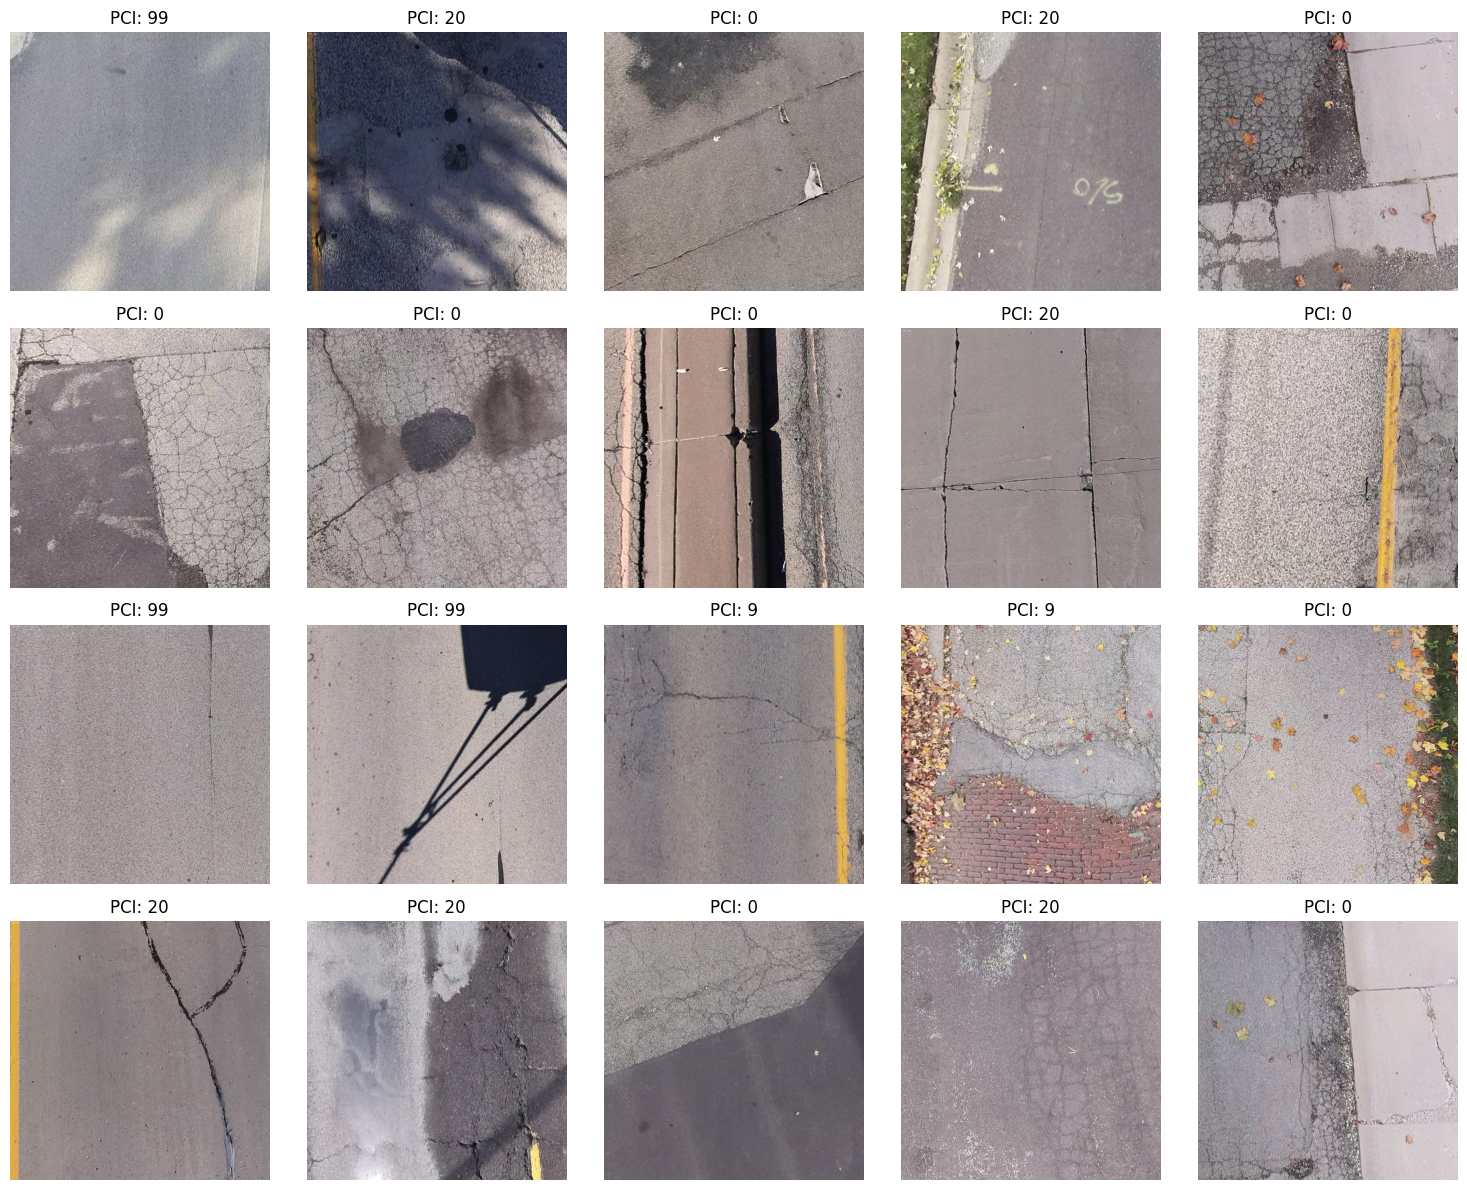

In [103]:
# Display images with specified PCI values in a 4x5 grid for values in the bottom 10
pci_values = [0, 9, 20, 99]
display_images_with_specified_pci(label, image_folder_path, pci_values)

In [104]:
# Importing Pytorch libraries

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms as transforms
import torchvision
from torch.optim import lr_scheduler
from skimage import io
import torch.nn.functional as F
import torchvision.models as models
from PIL import Image, ImageFile
from torch import Generator

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Allows loading of truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

### Training and Validation Dataset

In [11]:
class ImageTrainDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None):
        # Load and filter out negative PCI values
        img_labels = pd.read_csv(annotations_file)
        img_labels = img_labels[img_labels['pci'] > 0]

        # Check for and remove bad images
        valid_images = []
        for _, row in img_labels.iterrows():
            img_path = os.path.join(img_dir, row[0])
            try:
                with Image.open(img_path) as img:
                    valid_images.append(row)
            except Exception as e:
                print(f"Invalid image {img_path}: {e}")

        self.img_labels = pd.DataFrame(valid_images)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = Image.open(img_path).convert('RGB')
        label = self.img_labels.iloc[idx, 1]
        label = torch.tensor(int(label))

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ColorJitter(brightness=0.4, contrast=0.2, saturation=0.2, hue=0.2),
    #transforms.RandomRotation(degrees=45),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomGrayscale(p=0.3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset
#/content/drive/MyDrive/train/train/train
#/content/drive/MyDrive/train/train/train.csv
annotations_file = '/content/train.csv'
img_dir = '/content/train'
dataset = ImageTrainDataset(annotations_file=annotations_file, img_dir=img_dir, transform=transform)

# Split dataset into train and validation sets
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Seed for reproducibility
generator = Generator().manual_seed(42)
train_dataset, val_dataset = random_split(dataset, [train_size, val_size], generator=generator)

# Create DataLoader for train and validation sets
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)

Invalid image /content/train/1119_(40.7034233333333, -89.4052588333333)_ 2023-10-18 15-49-01_14.30605_D.jpg: cannot identify image file '/content/train/1119_(40.7034233333333, -89.4052588333333)_ 2023-10-18 15-49-01_14.30605_D.jpg'
Invalid image /content/train/11980_(40.6916493333333, -89.4393206666667)_ 2023-10-20 16-10-54_28.5085_D.jpg: cannot identify image file '/content/train/11980_(40.6916493333333, -89.4393206666667)_ 2023-10-20 16-10-54_28.5085_D.jpg'


### Training and Validation

In [12]:
def train_and_validate(model, train_loader, valid_loader, criterion, optimizer, scheduler, epochs, device, model_save_path, early_stopping_patience=30):
    model.train()
    train_losses, val_losses, val_mapes = [], [], []
    best_model_val_mapes = float("inf")
    epochs_no_improve = 0

    for epoch in range(epochs):
        total_train_loss = 0

        for data, targets in train_loader:
            data, targets = data.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs.squeeze(), targets.float())
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        train_loss = total_train_loss / len(train_loader)
        train_losses.append(train_loss)

        # Learning rate scheduler step
        scheduler.step()

        # Validation phase
        model.eval()
        total_val_loss = 0
        total_val_mape = 0

        with torch.no_grad():
            for data, targets in valid_loader:
                data, targets = data.to(device), targets.to(device)
                outputs = model(data)
                val_loss = criterion(outputs.squeeze(), targets.float())
                total_val_loss += val_loss.item()

                # Calculate MAPE
                mape = torch.mean(torch.abs((targets - outputs.squeeze()) / targets)) * 100
                total_val_mape += mape.item()

        val_loss = total_val_loss / len(valid_loader)
        val_losses.append(val_loss)
        val_mape = total_val_mape / len(valid_loader)
        val_mapes.append(val_mape)

        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val MAPE: {val_mape:.2f}%')

        # Early Stopping and Model Saving Logic
        if val_mape < best_model_val_mapes:
            best_model_val_mapes = val_mape
            epochs_no_improve = 0  # Reset counter
            # Save the model
            torch.save({
                "epoch": epoch,
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
            }, model_save_path)
            print(f'Model improved and saved to {model_save_path} at epoch {epoch}')
        else:
            epochs_no_improve += 1
            print(f'No improvement in Val MAPE for {epochs_no_improve} epochs.')

        if epochs_no_improve >= early_stopping_patience:
            print(f'Early stopping triggered after {epoch+1} epochs.')
            break  # Break out of the loop if early stopping is triggered

    return train_losses, val_losses, val_mapes

### Test Dataset

In [13]:
class ImageTestDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_names = []

        # Check for and only add valid images
        all_img_names = os.listdir(img_dir)
        for img_name in all_img_names:
            img_path = os.path.join(img_dir, img_name)
            try:
                with Image.open(img_path) as img:
                    self.img_names.append(img_name)
            except Exception as e:
                print(f"Invalid image {img_path}: {e}")

    def __len__(self):
        return len(self.img_names)

    def __getitem__(self, idx):
        img_name = self.img_names[idx]
        img_path = os.path.join(self.img_dir, img_name)
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, img_name

# Defining the transform for the test set
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create the test dataset
test_dataset = ImageTestDataset(img_dir='/content/test', transform=test_transform)
#/content/drive/MyDrive/test/test

# Create the DataLoader for the test set
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

### Evaluate the Test Dataset

In [14]:
def evaluate_model(model, test_loader, criterion, device):
    model.eval()
    total_mse = 0
    total_mape = 0
    with torch.no_grad():
        for data, targets in test_loader:
            data, targets = data.to(device), targets.to(device)
            outputs = model(data).squeeze()

            mse = criterion(outputs, targets.float())
            total_mse += mse.item()

            mape = torch.mean(torch.abs((targets - outputs) / targets)) * 100
            total_mape += mape.item()

    avg_mse = total_mse / len(test_loader)
    avg_mape = total_mape / len(test_loader)
    print(f'Test MSE: {avg_mse:.4f}, Test MAPE: {avg_mape:.2f}%')

### Visualizing the Learning Curves

In [15]:
def plot_learning_curves(train_losses, val_losses, val_mapes):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'r-', label='Training Loss')
    plt.plot(epochs, val_losses, 'b--', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_mapes, 'g-', label='Validation MAPE')
    plt.title('Validation MAPE')
    plt.xlabel('Epoch')
    plt.ylabel('MAPE (%)')
    plt.legend()

    plt.show()

### Predicting PCI using Test Dataset

In [16]:
def Evaluate_and_store_predictions(model, test_loader, device):
    model.eval()
    predictions = []

    with torch.no_grad():
        for data, file_names in test_loader:
            data = data.to(device)
            outputs = model(data).squeeze()

            # Convert outputs to CPU for DataFrame storage
            outputs = outputs.cpu().numpy()

            # Round predictions and cap at 100
            outputs = np.round(outputs)  # Round to nearest number
            outputs = np.clip(outputs, None, 100)  # Cap values at 100

            for file_name, output in zip(file_names, outputs):
                predictions.append({'image_name': file_name, 'PCI': output})

    return pd.DataFrame(predictions)

### Generating JSON File Using Saved DataFrame

In [17]:
import json

def gen_submit(df,num):
    out_json = []
    for idx, results in df.iterrows():
        out_json.append({results['image_name']: results['PCI']})
    with open('submission_{}.json'.format(num), 'w') as f:
        json.dump(out_json, f)

### ResNet50 Model

In [18]:
from torch.nn import MultiheadAttention

In [19]:
class ResNet50WithAttention(nn.Module):
    def __init__(self, num_classes=1000):
        super(ResNet50WithAttention, self).__init__()
        self.resnet = resnet50(pretrained=True)

        # Modify the ResNet50 model
        # Remove the last layer (fully connected layer)
        self.features = nn.Sequential(*list(self.resnet.children())[:-2])

        # Adding MultiheadAttention after the 4th layer/block
        self.multihead_attn = MultiheadAttention(embed_dim=2048, num_heads=8)

        # Pooling layer
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        # Classifier
        self.fc = nn.Linear(2048, num_classes)

    def forward(self, x):
      # Pass input through ResNet layers
      x = self.features(x)

      # Adjust shape for the multi-head attention layer
      x = x.flatten(2)  # Flatten the spatial dimensions
      x = x.permute(2, 0, 1)  # Change to (seq_len, batch, embed_dim) for attention

      # Multi-head attention
      attn_output, _ = self.multihead_attn(x, x, x)

      # Reshape the output of attention
      # Match the expected input shape of the avgpool layer
      attn_output = attn_output.permute(1, 2, 0).reshape(x.size(1), 2048, -1)
      attn_output = attn_output.mean(dim=2).unsqueeze(-1).unsqueeze(-1)

      # Pooling
      x = self.avgpool(attn_output)

      # Flatten the output for the classifier
      x = torch.flatten(x, 1)

      # Classifier
      x = self.fc(x)

      return x

In [21]:
# Initialize the attention-enhanced ResNet50 model
#resnet50_attention_model = resnet50_cbam(pretrained=True)
from torchvision.models import resnet50

resnet50_attention_model = ResNet50WithAttention(num_classes=1)
num_ftrs = resnet50_attention_model.fc.in_features
resnet50_attention_model.fc = nn.Linear(num_ftrs, 1)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
resnet50_attention_model = resnet50_attention_model.to(device)

# Define Mean Squared Error Loss function for regression
criterion = nn.MSELoss()

# Define optimizer (Adam) with a learning rate of 0.0001
optimizer = optim.Adam(resnet50_attention_model.parameters(), lr=0.0001)

# Define a learning rate scheduler to decay LR by a factor of 0.1 every 10 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 72.5MB/s]


In [22]:
epochs = 50

train_losses, val_losses, val_mapes = train_and_validate(
    model=resnet50_attention_model,
    train_loader=train_loader,
    valid_loader=valid_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=exp_lr_scheduler,
    epochs=epochs,
    device=device,
    model_save_path='./model_best.pth',
    early_stopping_patience=20
)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/50, Train Loss: 633.0302, Val Loss: 395.5818, Val MAPE: 64.50%
Model improved and saved to ./model_best.pth at epoch 0
Epoch 2/50, Train Loss: 465.0792, Val Loss: 370.7488, Val MAPE: 60.74%
Model improved and saved to ./model_best.pth at epoch 1
Epoch 3/50, Train Loss: 388.7899, Val Loss: 288.4366, Val MAPE: 57.09%
Model improved and saved to ./model_best.pth at epoch 2
Epoch 4/50, Train Loss: 353.7833, Val Loss: 365.6974, Val MAPE: 50.41%
Model improved and saved to ./model_best.pth at epoch 3
Epoch 5/50, Train Loss: 354.2275, Val Loss: 280.2872, Val MAPE: 54.03%
No improvement in Val MAPE for 1 epochs.
Epoch 6/50, Train Loss: 317.3058, Val Loss: 268.4311, Val MAPE: 47.10%
Model improved and saved to ./model_best.pth at epoch 5
Epoch 7/50, Train Loss: 317.9623, Val Loss: 304.2782, Val MAPE: 62.12%
No improvement in Val MAPE for 1 epochs.
Epoch 8/50, Train Loss: 294.8805, Val Loss: 332.7433, Val MAPE: 48.46%
No improvement in Val MAPE for 2 epochs.
Epoch 9/50, Train Loss: 278.1

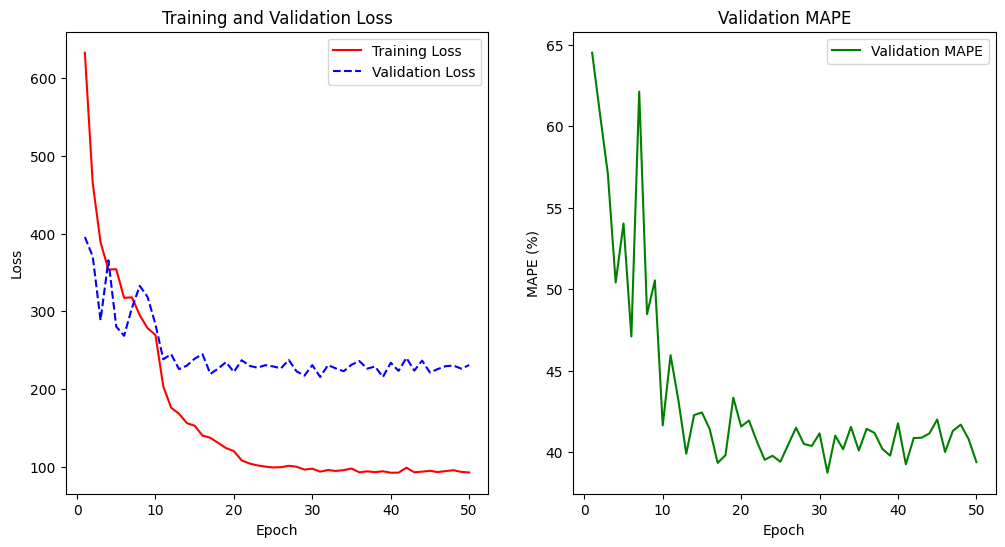

In [23]:
# Plot the learning curves
plot_learning_curves(train_losses, val_losses, val_mapes)

In [69]:
pred_resnet1= Evaluate_and_store_predictions(resnet50_attention_model, test_loader, device)
pred_resnet1

image_name   PCI
0     60437_(40.70215, -89.4582306666667)_ 2023-10-2...  71.0
1     25152_(40.7033668333333, -89.4094348333333)_ 2...  28.0
2     33818_(40.717767, -89.421061)_ 2023-10-18 19-2...  86.0
3     5946_[40.70351769124935, -89.39902491357056]_ ...  48.0
4     25194_(40.7033601666667, -89.4070073333333)_ 2...  31.0
...                                                 ...   ...
3297  19139_[40.70335955476668, -89.44360758448286]_...  23.0
3298  60134_[40.691431928901864, -89.46022234862521]...  66.0
3299  5363_(40.7044485, -89.3934166666667)_ 2023-10-...  11.0
3300  4065_(40.7067238333333, -89.3874136666667)_ 20...  57.0
3301  16707_[40.696782257037306, -89.47728725425662]...  92.0

[3302 rows x 2 columns]

In [25]:
gen_submit(pred_resnet1, 1)

In [26]:
def load_best_model(model, model_save_path, device):
    checkpoint = torch.load(model_save_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    return model

In [71]:
model_save_path = './model_best.pth'
densenet_model = load_best_model(resnet50_attention_model, model_save_path, device)

In [72]:
pred_resnet2= Evaluate_and_store_predictions(resnet50_attention_model, test_loader, device)
pred_resnet2

image_name   PCI
0     60437_(40.70215, -89.4582306666667)_ 2023-10-2...  71.0
1     25152_(40.7033668333333, -89.4094348333333)_ 2...  28.0
2     33818_(40.717767, -89.421061)_ 2023-10-18 19-2...  86.0
3     5946_[40.70351769124935, -89.39902491357056]_ ...  48.0
4     25194_(40.7033601666667, -89.4070073333333)_ 2...  31.0
...                                                 ...   ...
3297  19139_[40.70335955476668, -89.44360758448286]_...  23.0
3298  60134_[40.691431928901864, -89.46022234862521]...  66.0
3299  5363_(40.7044485, -89.3934166666667)_ 2023-10-...  11.0
3300  4065_(40.7067238333333, -89.3874136666667)_ 20...  57.0
3301  16707_[40.696782257037306, -89.47728725425662]...  92.0

[3302 rows x 2 columns]

In [29]:
gen_submit(pred_resnet2, 2)

### Densenet161 with a few data augmentation modifications

In [30]:
# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ColorJitter(brightness=0.4, contrast=0.2, saturation=0.2, hue=0.2),
    #transforms.RandomRotation(degrees=45),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    #transforms.RandomGrayscale(p=0.3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset
#/content/drive/MyDrive/train/train/train
#/content/drive/MyDrive/train/train/train.csv
annotations_file = '/content/train.csv'
img_dir = '/content/train'
dataset = ImageTrainDataset(annotations_file=annotations_file, img_dir=img_dir, transform=transform)

# Split dataset into train and validation sets
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Seed for reproducibility
generator = Generator().manual_seed(42)
train_dataset, val_dataset = random_split(dataset, [train_size, val_size], generator=generator)

# Create DataLoader for train and validation sets
train_loader1 = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
valid_loader1 = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)

Invalid image /content/train/1119_(40.7034233333333, -89.4052588333333)_ 2023-10-18 15-49-01_14.30605_D.jpg: cannot identify image file '/content/train/1119_(40.7034233333333, -89.4052588333333)_ 2023-10-18 15-49-01_14.30605_D.jpg'
Invalid image /content/train/11980_(40.6916493333333, -89.4393206666667)_ 2023-10-20 16-10-54_28.5085_D.jpg: cannot identify image file '/content/train/11980_(40.6916493333333, -89.4393206666667)_ 2023-10-20 16-10-54_28.5085_D.jpg'


In [32]:
# DenseNet161

densenet = models.densenet161(weights=True)
num_ftrs = densenet.classifier.in_features
densenet.classifier = nn.Linear(num_ftrs, 1)

# Move model to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
densenet = densenet.to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(densenet.parameters(), lr=0.0001)

# Decay LR by a factor of 0.1 every 10 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [33]:
epochs = 50

train_losses1, val_losses1, val_mapes1 = train_and_validate(
    model=densenet,
    train_loader=train_loader1,
    valid_loader=valid_loader1,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=exp_lr_scheduler,
    epochs=epochs,
    device=device,
    model_save_path='./densenet_best1.pth',
    early_stopping_patience=30
)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/50, Train Loss: 3893.8262, Val Loss: 2593.4821, Val MAPE: 72.18%
Model improved and saved to ./densenet_best1.pth at epoch 0
Epoch 2/50, Train Loss: 563.8752, Val Loss: 346.7298, Val MAPE: 49.30%
Model improved and saved to ./densenet_best1.pth at epoch 1
Epoch 3/50, Train Loss: 400.1901, Val Loss: 324.1693, Val MAPE: 50.78%
No improvement in Val MAPE for 1 epochs.
Epoch 4/50, Train Loss: 360.2086, Val Loss: 333.5215, Val MAPE: 50.55%
No improvement in Val MAPE for 2 epochs.
Epoch 5/50, Train Loss: 345.7763, Val Loss: 311.7508, Val MAPE: 59.86%
No improvement in Val MAPE for 3 epochs.
Epoch 6/50, Train Loss: 324.5998, Val Loss: 320.0890, Val MAPE: 61.79%
No improvement in Val MAPE for 4 epochs.
Epoch 7/50, Train Loss: 305.8251, Val Loss: 296.8437, Val MAPE: 48.86%
Model improved and saved to ./densenet_best1.pth at epoch 6
Epoch 8/50, Train Loss: 287.7584, Val Loss: 274.9630, Val MAPE: 53.42%
No improvement in Val MAPE for 1 epochs.
Epoch 9/50, Train Loss: 283.7638, Val Loss: 3

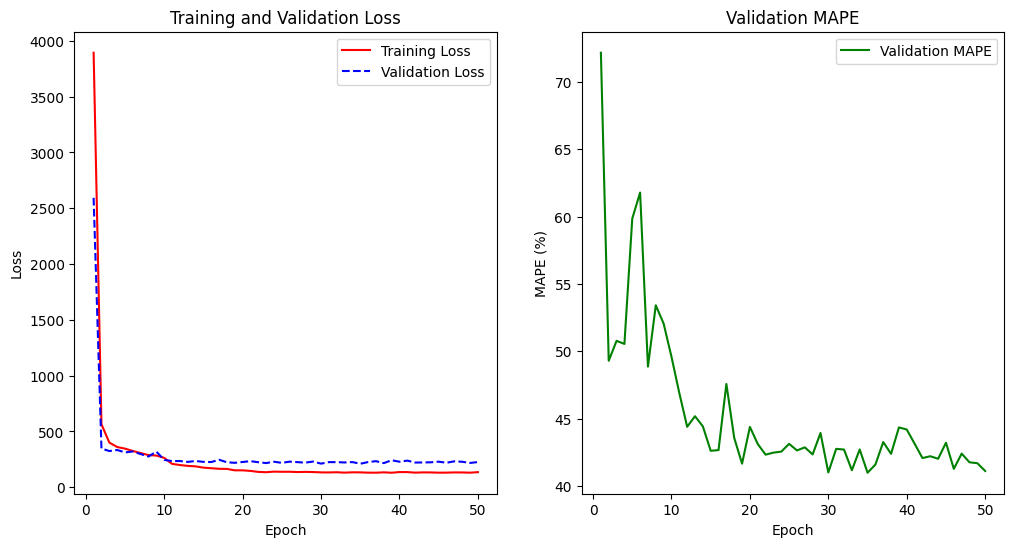

In [34]:
# Plot the learning curves
plot_learning_curves(train_losses1, val_losses1, val_mapes1)

In [35]:
model_save_path = './densenet_best1.pth'
densenet_model1 = load_best_model(densenet, model_save_path, device)

In [36]:
pred_densenet1 = Evaluate_and_store_predictions(densenet_model1, test_loader, device)
pred_densenet1

image_name   PCI
0     60437_(40.70215, -89.4582306666667)_ 2023-10-2...  66.0
1     25152_(40.7033668333333, -89.4094348333333)_ 2...  38.0
2     33818_(40.717767, -89.421061)_ 2023-10-18 19-2...  83.0
3     5946_[40.70351769124935, -89.39902491357056]_ ...  46.0
4     25194_(40.7033601666667, -89.4070073333333)_ 2...  24.0
...                                                 ...   ...
3297  19139_[40.70335955476668, -89.44360758448286]_...  38.0
3298  60134_[40.691431928901864, -89.46022234862521]...  63.0
3299  5363_(40.7044485, -89.3934166666667)_ 2023-10-...   8.0
3300  4065_(40.7067238333333, -89.3874136666667)_ 20...  47.0
3301  16707_[40.696782257037306, -89.47728725425662]...  98.0

[3302 rows x 2 columns]

In [37]:
gen_submit(pred_densenet1, 3)

### Densenet161 with more data augmentation modifications

In [38]:
# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ColorJitter(brightness=0.4, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomRotation(degrees=45),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    #transforms.RandomGrayscale(p=0.3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset
#/content/drive/MyDrive/train/train/train
#/content/drive/MyDrive/train/train/train.csv
annotations_file = '/content/train.csv'
img_dir = '/content/train'
dataset = ImageTrainDataset(annotations_file=annotations_file, img_dir=img_dir, transform=transform)

# Split dataset into train and validation sets
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Seed for reproducibility
generator = Generator().manual_seed(42)
train_dataset, val_dataset = random_split(dataset, [train_size, val_size], generator=generator)

# Create DataLoader for train and validation sets
train_loader2 = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
valid_loader2 = DataLoader(dataset=val_dataset, batch_size=64, shuffle=False)

Invalid image /content/train/1119_(40.7034233333333, -89.4052588333333)_ 2023-10-18 15-49-01_14.30605_D.jpg: cannot identify image file '/content/train/1119_(40.7034233333333, -89.4052588333333)_ 2023-10-18 15-49-01_14.30605_D.jpg'
Invalid image /content/train/11980_(40.6916493333333, -89.4393206666667)_ 2023-10-20 16-10-54_28.5085_D.jpg: cannot identify image file '/content/train/11980_(40.6916493333333, -89.4393206666667)_ 2023-10-20 16-10-54_28.5085_D.jpg'


In [39]:
# DenseNet161

densenet2 = models.densenet161(weights=True)
num_ftrs = densenet2.classifier.in_features
densenet2.classifier = nn.Linear(num_ftrs, 1)

# Move model to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
densenet2 = densenet2.to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(densenet2.parameters(), lr=0.0001)

# Decay LR by a factor of 0.1 every 10 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet161_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet161_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [40]:
epochs = 50

train_losses2, val_losses2, val_mapes2 = train_and_validate(
    model=densenet2,
    train_loader=train_loader2,
    valid_loader=valid_loader2,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=exp_lr_scheduler,
    epochs=epochs,
    device=device,
    model_save_path='./densenet_best2.pth',
    early_stopping_patience=30
)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/50, Train Loss: 4412.8734, Val Loss: 4217.7570, Val MAPE: 105.98%
Model improved and saved to ./densenet_best2.pth at epoch 0
Epoch 2/50, Train Loss: 681.4138, Val Loss: 440.2899, Val MAPE: 69.28%
Model improved and saved to ./densenet_best2.pth at epoch 1
Epoch 3/50, Train Loss: 470.5661, Val Loss: 349.4062, Val MAPE: 59.74%
Model improved and saved to ./densenet_best2.pth at epoch 2
Epoch 4/50, Train Loss: 419.0176, Val Loss: 349.2882, Val MAPE: 63.21%
No improvement in Val MAPE for 1 epochs.
Epoch 5/50, Train Loss: 414.1662, Val Loss: 366.6469, Val MAPE: 65.40%
No improvement in Val MAPE for 2 epochs.
Epoch 6/50, Train Loss: 365.8147, Val Loss: 362.0577, Val MAPE: 53.23%
Model improved and saved to ./densenet_best2.pth at epoch 5
Epoch 7/50, Train Loss: 380.8865, Val Loss: 290.3809, Val MAPE: 57.11%
No improvement in Val MAPE for 1 epochs.
Epoch 8/50, Train Loss: 375.1314, Val Loss: 291.1592, Val MAPE: 45.37%
Model improved and saved to ./densenet_best2.pth at epoch 7
Epoch 

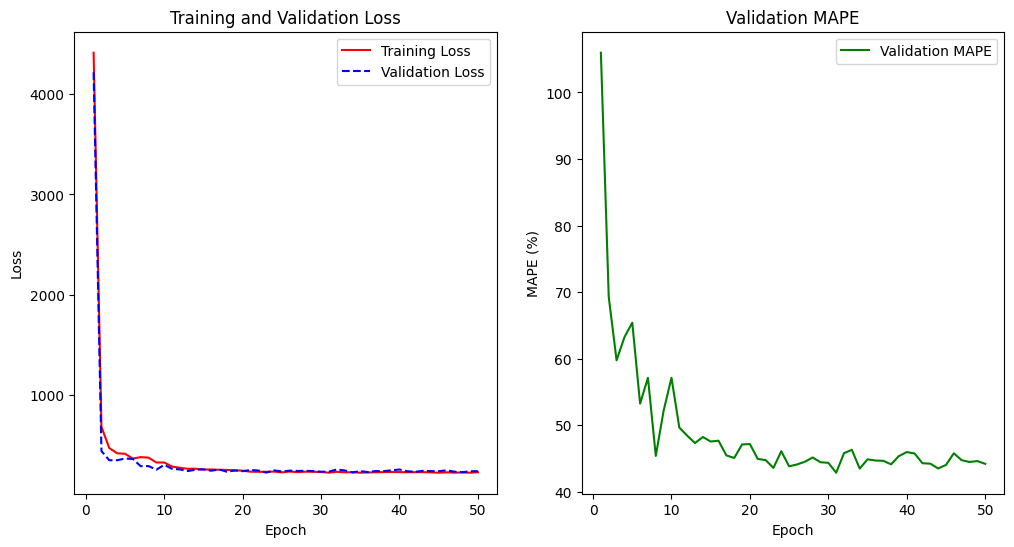

In [41]:
# Plot the learning curves
plot_learning_curves(train_losses2, val_losses2, val_mapes2)

In [42]:
model_save_path = './densenet_best2.pth'
densenet_model2 = load_best_model(densenet2, model_save_path, device)

In [43]:
pred_densenet2 = Evaluate_and_store_predictions(densenet_model2, test_loader, device)
pred_densenet2

image_name   PCI
0     60437_(40.70215, -89.4582306666667)_ 2023-10-2...  70.0
1     25152_(40.7033668333333, -89.4094348333333)_ 2...  32.0
2     33818_(40.717767, -89.421061)_ 2023-10-18 19-2...  85.0
3     5946_[40.70351769124935, -89.39902491357056]_ ...  52.0
4     25194_(40.7033601666667, -89.4070073333333)_ 2...  22.0
...                                                 ...   ...
3297  19139_[40.70335955476668, -89.44360758448286]_...  34.0
3298  60134_[40.691431928901864, -89.46022234862521]...  67.0
3299  5363_(40.7044485, -89.3934166666667)_ 2023-10-...   6.0
3300  4065_(40.7067238333333, -89.3874136666667)_ 20...  52.0
3301  16707_[40.696782257037306, -89.47728725425662]...  98.0

[3302 rows x 2 columns]

In [44]:
gen_submit(pred_densenet2, 4)

### Ensemble Models

In [74]:
# Rename 'PCI' column in each DataFrame
pred_resnet1.rename(columns={'PCI': 'PCI_resnet1'}, inplace=True)
pred_resnet2.rename(columns={'PCI': 'PCI_resnet2'}, inplace=True)
pred_densenet1.rename(columns={'PCI': 'PCI_densenet1'}, inplace=True)
pred_densenet2.rename(columns={'PCI': 'PCI_densenet2'}, inplace=True)

In [67]:
# Merge dataframes

df = pred_resnet2.merge(pred_densenet1, on='image_name')
df_ensemble = df.merge(pred_densenet2, on='image_name')
df_ensemble

image_name  PCI_resnet  \
0     60437_(40.70215, -89.4582306666667)_ 2023-10-2...        71.0   
1     25152_(40.7033668333333, -89.4094348333333)_ 2...        28.0   
2     33818_(40.717767, -89.421061)_ 2023-10-18 19-2...        86.0   
3     5946_[40.70351769124935, -89.39902491357056]_ ...        48.0   
4     25194_(40.7033601666667, -89.4070073333333)_ 2...        31.0   
...                                                 ...         ...   
3297  19139_[40.70335955476668, -89.44360758448286]_...        23.0   
3298  60134_[40.691431928901864, -89.46022234862521]...        66.0   
3299  5363_(40.7044485, -89.3934166666667)_ 2023-10-...        11.0   
3300  4065_(40.7067238333333, -89.3874136666667)_ 20...        57.0   
3301  16707_[40.696782257037306, -89.47728725425662]...        92.0   

      PCI_densenet1  PCI_densenet2  
0              66.0           70.0  
1              38.0           32.0  
2              83.0           85.0  
3              46.0           52.0  
4              24.0           22.0  
...             ...            ...  
3297           38.0           34.0  
3298           63.0           67.0  
3299            8.0            6.0  
3300           47.0           52.0  
3301           98.0           98.0  

[3302 rows x 4 columns]

In [50]:
percentile_df = df_ensemble.quantile(q=0.01, axis=1)

<ipython-input-50-83d3af237642>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile_df = df_ensemble.quantile(0.005, axis=1)


In [51]:
df_ensemble['PCI'] = percentile_df
df_ensemble

image_name  PCI_resnet  \
0     60437_(40.70215, -89.4582306666667)_ 2023-10-2...        71.0   
1     25152_(40.7033668333333, -89.4094348333333)_ 2...        28.0   
2     33818_(40.717767, -89.421061)_ 2023-10-18 19-2...        86.0   
3     5946_[40.70351769124935, -89.39902491357056]_ ...        48.0   
4     25194_(40.7033601666667, -89.4070073333333)_ 2...        31.0   
...                                                 ...         ...   
3297  19139_[40.70335955476668, -89.44360758448286]_...        23.0   
3298  60134_[40.691431928901864, -89.46022234862521]...        66.0   
3299  5363_(40.7044485, -89.3934166666667)_ 2023-10-...        11.0   
3300  4065_(40.7067238333333, -89.3874136666667)_ 20...        57.0   
3301  16707_[40.696782257037306, -89.47728725425662]...        92.0   

      PCI_densenet1  PCI_densenet2      PCI  
0              66.0           70.0  66.0012  
1              38.0           32.0  28.0012  
2              83.0           85.0  83.0006  
3              46.0           52.0  46.0006  
4              24.0           22.0  22.0006  
...             ...            ...      ...  
3297           38.0           34.0  23.0033  
3298           63.0           67.0  63.0009  
3299            8.0            6.0   6.0006  
3300           47.0           52.0  47.0015  
3301           98.0           98.0  92.0018  

[3302 rows x 5 columns]

In [52]:
gen_submit(df_ensemble, 101)